# Kuala Lumpur School of AI

## Introduction to Data Analysis

### Outline 

1) Load Data Set

2) Data Cleaning and Exploration

3) Data Analysis
   * Q1: How does the population growth defer in the US and in China?
   * Q2: How does the GDP Per Capita defer in the US and China?
   * Q3: What is the relationship between GDP Per Capita and Life Expectancy?
   
4) Real World Case Study (If we have time)
   * Q: Whats the richest country in the world on a per-person basis?

### Step 1: Loading Our Data Set



Now, let's import the **pandas** library (a pythonic library used for data manipulation and analysis) to help us load our data set.

In [7]:
import pandas as pd

Once imported, we will use pandas (here abbreviated as *pd*) to load our .csv file.

In [98]:
data = pd.read_csv('data/world_countries.csv')

In [99]:
data.head()


,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


**Congratulations! You have loaded your first data set with pandas!**

### Step 2: Data Cleaning and Exploration

   * Data cleaning is where you will spend 70% of your time as a data analyst/scientist. 
   * The objective of this morning session to get a **feel** for analytics, so we will use a clean data set
   * Later in the evening session, you will experience how one would need to *clean* their data before any exploration
   
   

#### Data types

In [17]:
data.dtypes

country            object
continent          object
year                int64
lifeExpectancy    float64
population          int64
gdpPerCapita      float64
dtype: object

* Objects = strings ie 'Malaysia'
* Int64 = Integers ie 2019
* Float64 = Float ie 25.1

* More info on python, pandas and numpy data types:
http://pbpython.com/pandas_dtypes.html

* Here you can also see how to convert from one data type to another.
* This is usually part of the *data cleaning* process. eg. *"1984"* can be stored as a **string**, you want it as an **integer**. 

#### Dimensions of the Pandas Data Frame

In [20]:
data.shape

(1704, 6)

This means that the Pandas Data Frame has 1704 rows × 6 columns

#### Missing values?

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country           1704 non-null object
continent         1704 non-null object
year              1704 non-null int64
lifeExpectancy    1704 non-null float64
population        1704 non-null int64
gdpPerCapita      1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


We have no null values! Lets move on. 

If you are curious to know what we should do with null values, we will explore this in the second session.

#### Slicing data

Now let's explore on how to access individual columns and rows within our data set

We know that our data set has 1704 rows and 6 columns.

How do I access row 1, column 2? 

We use the **method** *.iloc* which stands for *Index Location*

In [24]:
data.head()


,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [25]:
data.iloc[0 , 0] #Here we are accessing row 0 and column 0

'Afghanistan'

In [32]:
data.iloc[0:4 , 0] #Rows 0 to 3 and column 0

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
Name: country, dtype: object

In [27]:
data.iloc[0:4 , :] #Rows 0 to 3 and all columns 

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138


In [31]:
data.iloc[3:8 , 2:4] #Rows 3 to 7 and columns 2 to 3 

,year,lifeExpectancy
3,1967,34.020
4,1972,36.088
5,1977,38.438
6,1982,39.854
7,1987,40.822


**Pandas Series and Data Frames**

In [33]:
type(data.iloc[0:4 , 0]) # Several Rows of One Column

pandas.core.series.Series

In [34]:
type(data.iloc[0:4 , :]) # Several Rows and Several Columns 

pandas.core.frame.DataFrame

In [35]:
type(data.iloc[0 , 0]) # One Row and One Column

str

### Step 3: Data Analysis

The two main methods we are going to use today is frequency statistics and visualisations

* Let's analyse the data for Malaysia

First we need to extract the Malaysian data from the data set

In [45]:
malaysia = data[data.country == 'Malaysia']


In [46]:
malaysia

,country,continent,year,lifeExpectancy,population,gdpPerCapita
936,Malaysia,Asia,1952,48.463,6748378,1831.132894
937,Malaysia,Asia,1957,52.102,7739235,1810.066992
938,Malaysia,Asia,1962,55.737,8906385,2036.884944
939,Malaysia,Asia,1967,59.371,10154878,2277.742396
940,Malaysia,Asia,1972,63.010,11441462,2849.094780
941,Malaysia,Asia,1977,65.256,12845381,3827.921571
942,Malaysia,Asia,1982,68.000,14441916,4920.355951
943,Malaysia,Asia,1987,69.500,16331785,5249.802653
944,Malaysia,Asia,1992,70.693,18319502,7277.912802
945,Malaysia,Asia,1997,71.938,20476091,10132.909640


In [43]:
#malaysia

Now, suppose we want to know, whats the average life expenctancy, population and gdpPerCapita in Malaysia?

In [47]:
malaysia.describe()

,year,lifeExpectancy,population,gdpPerCapita
count,12.000000,12.000000,1.200000e+01,12.000000
mean,1979.500000,64.279583,1.457406e+07,5406.038197
std,18.027756,8.607689,5.990940e+06,3749.837228
min,1952.000000,48.463000,6.748378e+06,1810.066992
25%,1965.750000,58.462500,9.842755e+06,2217.528033
50%,1979.500000,66.628000,1.364365e+07,4374.138761
75%,1993.250000,71.004250,1.885865e+07,7991.662012
max,2007.000000,74.241000,2.482129e+07,12451.655800


Statistics are very useful to describe data but can be hard to understand without visualization 

**Lets do some basic visualisation**

First Import **matplotlib's pyplot** (abbriviated as *plt*) into our Jupyter Notebook

In [49]:
#from matplotlib import pyplot as plt

# #or simply 
import matplotlib.pyplot as plt`

**Simple line plot**

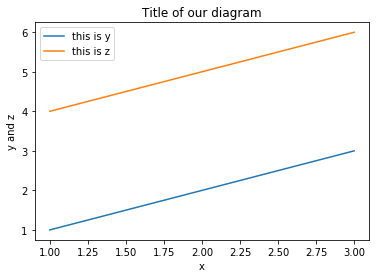

In [57]:
# Create a list of integers
x = [1,2,3]
y = [1,2,3]
z = [4,5,6] #add a 3rd variable

#Plot 
plt.plot(x,y)
plt.plot(x,z) #plot both lines

# #Add Title
plt.title('Title of our diagram')

# #Add labels
plt.xlabel('x')
#plt.ylabel('y')
plt.ylabel('y and z') #change y label to include y and z

# #Add legends
#plt.legend(["this is y"])
plt.legend(["this is y","this is z"])  #change legend to include both lines

#Show diagram
plt.show()

** Let's do some analysis!**

**Q1: How does the population growth defer in the US and in China?**

Step 1. Extract data from the US and China

In [58]:
us = data[data.country == 'United States']
china = data[data.country == 'China']

#Verify by viewing data 
#us.head()
#china.head

In [67]:
#china.year

In [63]:
china.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
288,China,Asia,1952,44.00000,556263527,400.448611
289,China,Asia,1957,50.54896,637408000,575.987001
290,China,Asia,1962,44.50136,665770000,487.674018
291,China,Asia,1967,58.38112,754550000,612.705693
292,China,Asia,1972,63.11888,862030000,676.900092


Step 2. Plot the population data over time

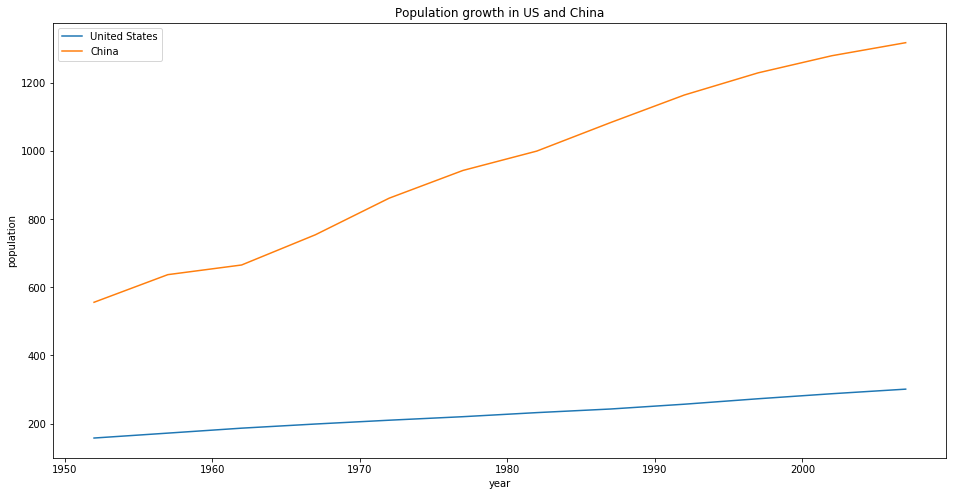

In [69]:
plt.figure(figsize=(16,8))

plt.plot(us.year, us.population / 10**6) #Make our population in millions 
plt.plot(china.year, china.population / 10**6)

plt.title('Population growth in US and China')
plt.legend(['United States','China'])
plt.xlabel("year")
plt.ylabel("population")

plt.show()

**Conclusive Insights**

* US population grew from 150 million to 300 million from 57 to 07 (50 yrs)
* China population grew from 550 million to 1.3 billion in 50 yrs

This is great but, how do we get more insight from this data?
* What is the relative growth? Is it higher in the US or China?

In [71]:
#US Population 

#us[['year','population']] #Data frame to Show the year and population in the US
us.population #Series of the population in the US

1608    157553000
1609    171984000
1610    186538000
1611    198712000
1612    209896000
1613    220239000
1614    232187835
1615    242803533
1616    256894189
1617    272911760
1618    287675526
1619    301139947
Name: population, dtype: int64

Lets devide the yearly population by the first year that we have

What is the first population? 
* It is the population in 1950. 
* How do we access this data?

In [72]:
us.population.iloc[0]

157553000

In [75]:
us.population / us.population.iloc[0] * 100 #This shows is the population growth each year when compared to t

#he year 1950. 

1608    100.000000
1609    109.159457
1610    118.396984
1611    126.123908
1612    133.222471
1613    139.787246
1614    147.371256
1615    154.109114
1616    163.052553
1617    173.219018
1618    182.589685
1619    191.135648
Name: population, dtype: float64

This shows is the population growth each year when compared to the year 1950. 

From here we can see that in *50 years*, the population in the US grew **91%**

Impressive! But what about China?

In [76]:
(china.population / china.population.iloc[0]) * 100 #This shows is the population growth each year when compared to the year 1950. 

288    100.000000
289    114.587416
290    119.686078
291    135.646140
292    154.967917
293    169.605763
294    179.821425
295    194.877958
296    209.427716
297    221.131701
298    230.178672
299    237.060859
Name: population, dtype: float64

The population in China grew **137%** !


**Lets visualise this result**

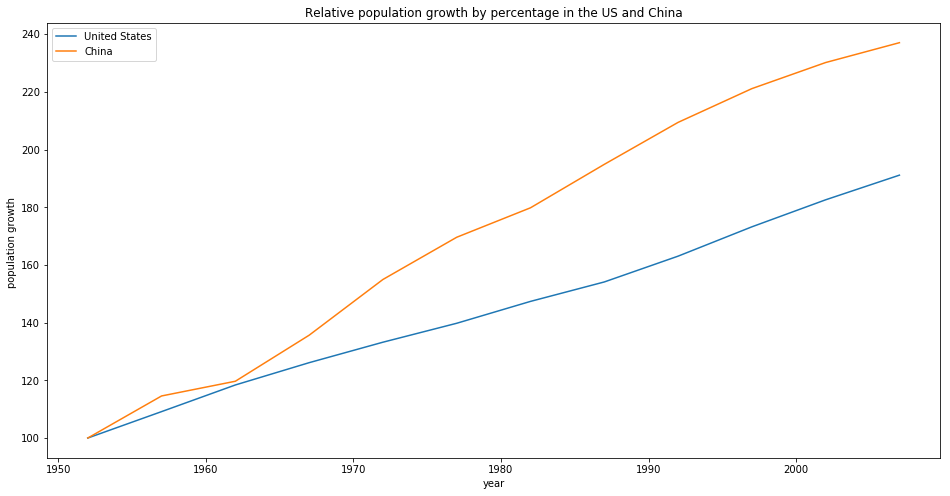

In [77]:
plt.figure(figsize=(16,8))

plt.plot(us.year, us.population / us.population.iloc[0] * 100)
plt.plot(china.year, china.population / china.population.iloc[0] * 100)

plt.title('Relative population growth by percentage in the US and China')
plt.legend(['United States','China'])

plt.xlabel("year")
plt.ylabel("population growth ")
plt.show()

**Conclusive Insights**
* The population in the US grew **91% form 150million to 300million in 50 years** 
* The population in China grew **137% form 550million to 1.3 billion in 50 years**

We now know the absolute growth amount and the growth rates of each country, allowing us to compare both countries.

We can theoretically do this for all countries by writting a python function and showing our results in a table or on a visualization, I will leave that to your imagination.

**Q2: How does the GDP Per Capita defer in the US and China?**

Here we have two of the worlds strongest economies. But when did China's Economy start to boost? Are they doing better than the US?

What is GDP Per Capita? 

* GDP Per Capita is the Annual GDP of a country devided by its population.

* ie. GDP Per Capita = Annual GDP / Population

https://www.investopedia.com/terms/g/gdp.asp

Let's do the same analysis for the US and China as we did before

**1. Absolute Growth**

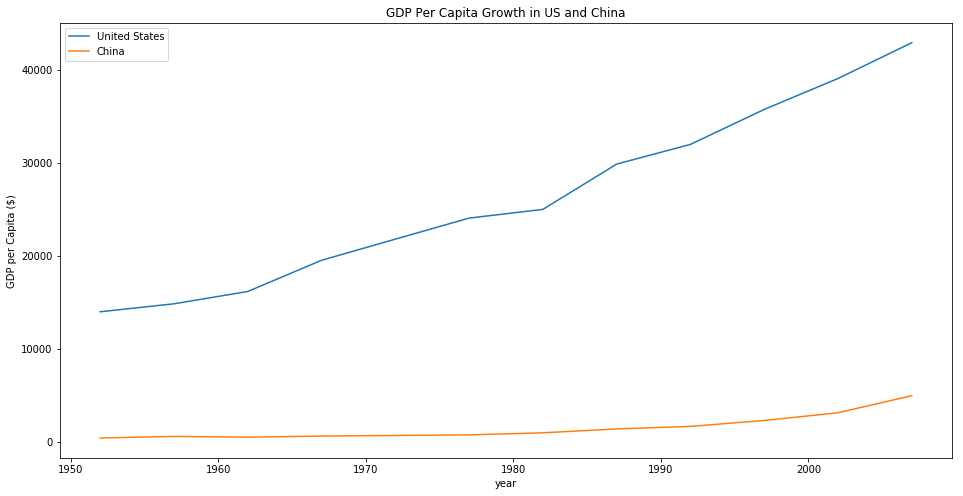

In [78]:
plt.figure(figsize=(16,8))

plt.plot(us.year, us.gdpPerCapita ) 
plt.plot(china.year, china.gdpPerCapita)

plt.title('GDP Per Capita Growth in US and China')
plt.legend(['United States','China'])
plt.xlabel("year")
plt.ylabel("GDP per Capita ($)")

plt.show()

**2. Relative Growth**

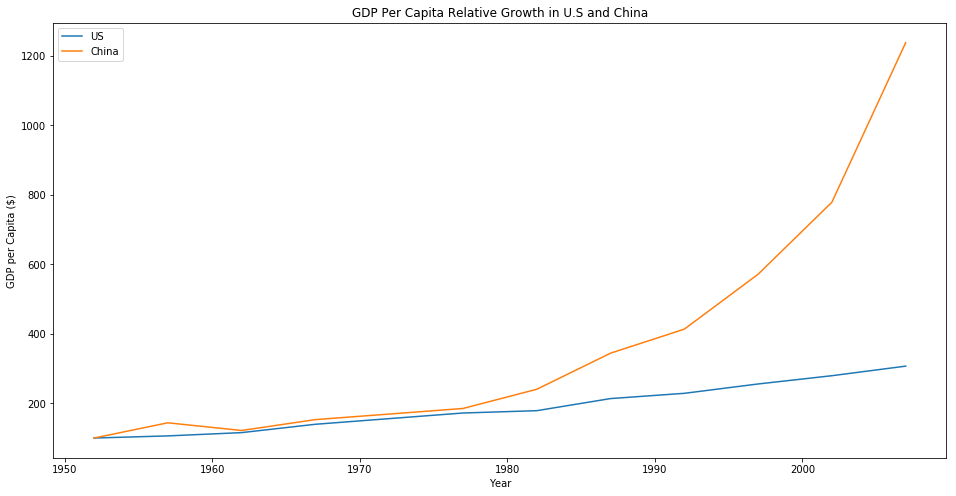

In [79]:
us_growth = us.gdpPerCapita/us.gdpPerCapita.iloc[0] * 100
china_growth = china.gdpPerCapita/china.gdpPerCapita.iloc[0] * 100

plt.figure(figsize=(16,8))
plt.plot(us.year, us_growth)
plt.plot(china.year, china_growth)
plt.title("GDP Per Capita Relative Growth in U.S and China")
plt.legend(["US","China"])
plt.xlabel("Year")
plt.ylabel("GDP per Capita ($)")
plt.show()


**Conclusive Insights**

* The GDP Per Capita in the US grew **200 %** form **14,000 USD** to **43,000 USD** in *50 years* 
* The GDP Per Capita in China grew **1140 %** form **400 USD** to **5000 USD** in *50 years*


* Remember GDP per capita is the GDP of a country / its population
* The US has 300 million people and China has 1.3 billion people
* I will leave it to you to explore the difference in GDP of the two countries
* More data and info on the economies of USA and China in this link: https://www.visualcapitalist.com/china-vs-united-states-a-tale-of-two-economies/


**Q3: What is the relationship between GDP Per Capita and Life Expectancy?**

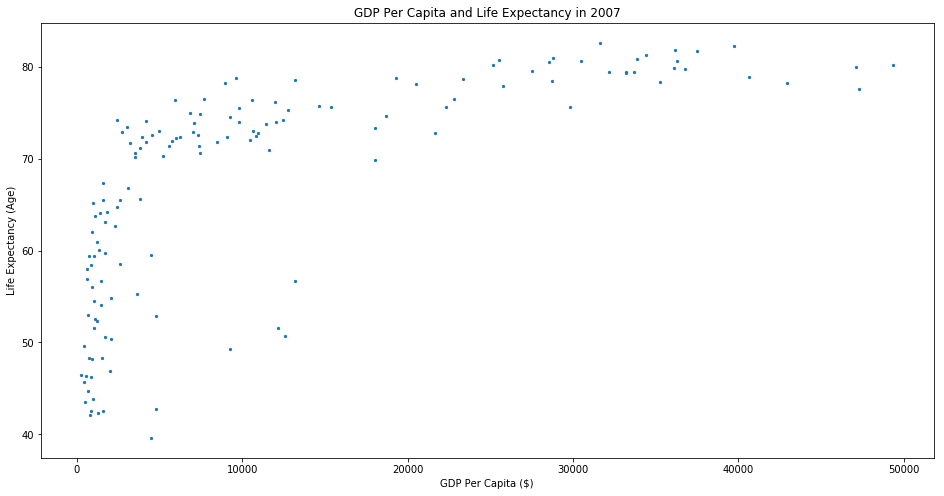

In [80]:
data_07 = data[data.year == 2007]
plt.figure(figsize=(16,8))
plt.scatter(data_07.gdpPerCapita, data_07.lifeExpectancy, 5)
plt.title('GDP Per Capita and Life Expectancy in 2007')
plt.xlabel("GDP Per Capita ($)")
plt.ylabel('Life Expectancy (Age)')
plt.show()

* The Life Expectency increases dramatically in the lower range of GDP increase, however, after $10,000, a large increase in GDP brings a slow increase in life expectancy 

* The relationship between the variables are non linear.


Let's check the corelation between GDP Per Cap and Life Expectancy

In [81]:
data_07.gdpPerCapita.corr(data_07.lifeExpectancy) 

0.6786623986777587

The corelation is neither good nor bad. 

How can we change this non-linear relationship to become linear?

* Log scales?

In [82]:
import numpy as np

np.log10([1, 10, 100, 1000]) #Log scale, 10^1 = 10, 10^2 = 100, 10^3 = 1000

array([0., 1., 2., 3.])

Let's plot the data using a log scale for the GDP Per Cap and check the corelation

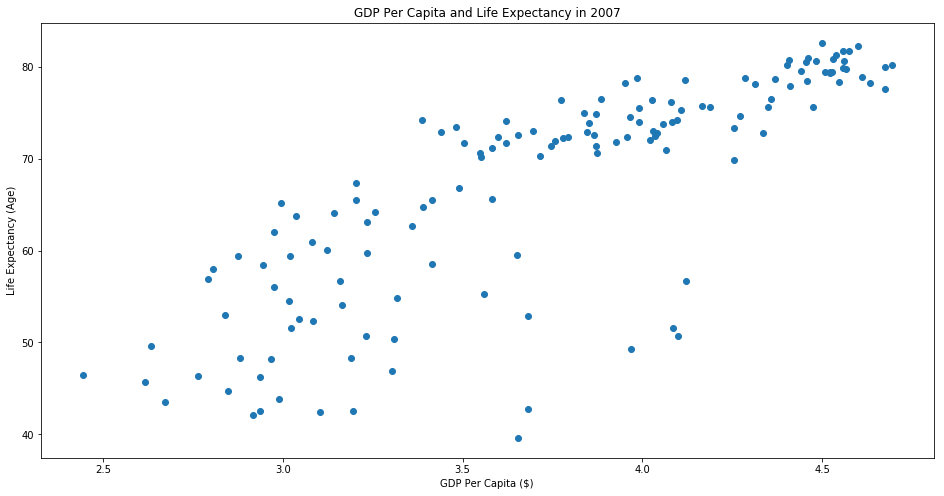

In [83]:
plt.figure(figsize=(16,8))
plt.scatter(np.log10(data_07.gdpPerCapita), data_07.lifeExpectancy)
plt.title('GDP Per Capita and Life Expectancy in 2007')
plt.xlabel("GDP Per Capita ($)")
plt.ylabel('Life Expectancy (Age)')
plt.show()

In [84]:
np.log10(data_07.gdpPerCapita).corr(data_07.lifeExpectancy) #When using the log scale

0.8089802514849209

In [85]:
years_sorted = sorted(set(data.year)) #set of years

for given_year in years_sorted:  #iterate through the years
    data_year = data[data.year == given_year] #choose data of given year
    plt.figure(figsize=(16,8)) #figure size
    #plt.scatter(data_year.gdpPerCapita, data_year.lifeExpectancy, 5) #plot absolute relationship of gdp n LE
    plt.scatter(np.log10(data_year.gdpPerCapita), data_year.lifeExpectancy, 5) #plot on log scale for gdp where 3 = 10^3 = 1000
    plt.title(given_year)
    #plt.xlim(0,60000)
    plt.xlim(2,5)
    plt.ylim(25, 85)   
    plt.xlabel('GDP Per Capita')
    plt.ylabel('Life Expectancy')
    #plt.show()
    plt.savefig('log_' + str(given_year), dpi = 200) #save figure
    plt.clf() #Clear the current plot

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

**Conclusive Insights**

* As the years have past, the Life Expectancy in the world has increased (Modern medicine?)
* The GDP of most countries have also increased (Globalization?)

### Part 4: Case Study 

#### Q: Whats the richest country in the world on a per-person basis?

In [86]:
# Load data 
data = pd.read_csv('data/world_countries.csv')

#Preview data
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [87]:
country_mean = data.groupby(['country']).mean()

In [88]:
country_mean.head()

,year,lifeExpectancy,population,gdpPerCapita
country,,,,
Afghanistan,1979.5,37.478833,1.582372e+07,802.674598
Albania,1979.5,68.432917,2.580249e+06,3255.366633
Algeria,1979.5,59.030167,1.987541e+07,4426.025973
Angola,1979.5,37.883500,7.309390e+06,3607.100529
Argentina,1979.5,69.060417,2.860224e+07,8955.553783


In [89]:
#Find 10 most highest GDP by countries

top10 = country_mean.sort_values('gdpPerCapita', ascending = False).head(10)
top10

,year,lifeExpectancy,population,gdpPerCapita
country,,,,
Kuwait,1979.5,68.922333,1.206496e+06,65332.910472
Switzerland,1979.5,75.565083,6.384293e+06,27074.334405
Norway,1979.5,75.843000,4.031441e+06,26747.306554
United States,1979.5,73.478500,2.282112e+08,26261.151347
Canada,1979.5,74.902750,2.446297e+07,22410.746340
Netherlands,1979.5,75.648500,1.378680e+07,21748.852208
Denmark,1979.5,74.370167,4.994187e+06,21671.824888
Germany,1979.5,73.444417,7.754704e+07,20556.684433
Iceland,1979.5,76.511417,2.269781e+05,20531.422272


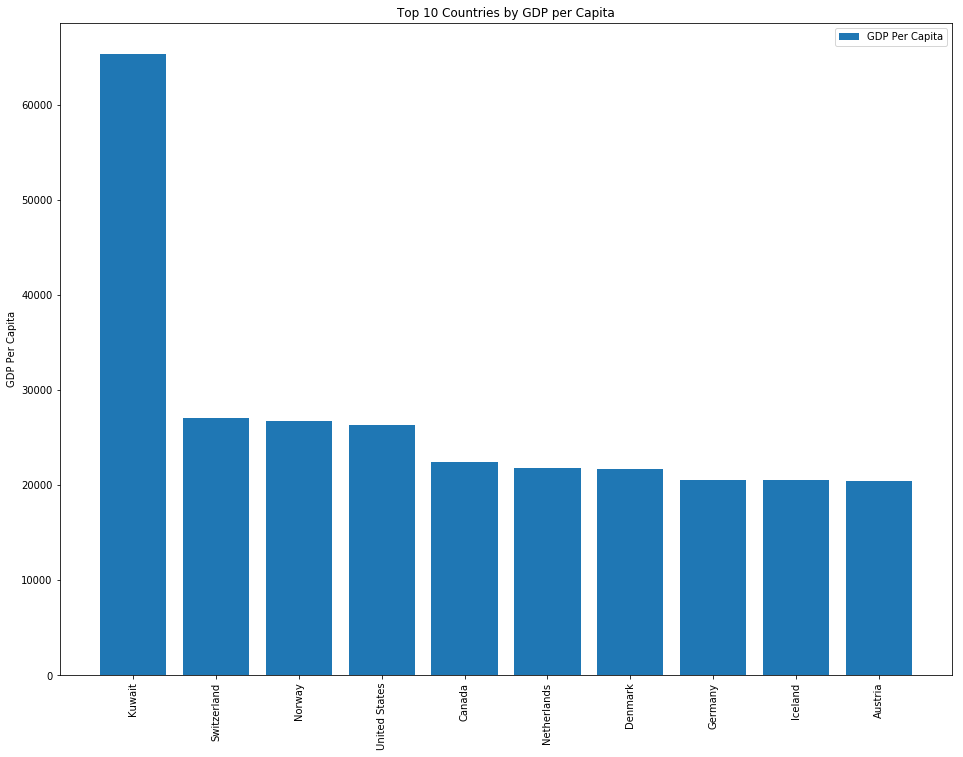

In [90]:
# Visualize

x = range(10)
plt.figure(figsize=(16,12))
plt.bar(x, top10.gdpPerCapita)
plt.xticks(x, top10.index, rotation = 'vertical')
plt.ylabel("GDP Per Capita")
plt.title('Top 10 Countries by GDP per Capita')
plt.legend(['GDP Per Capita'])
plt.show()

#### Is Kuwait really the richest country in the world (on a per-person basis?)

In [91]:
kuwait = data[data.country == 'Kuwait']
kuwait.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


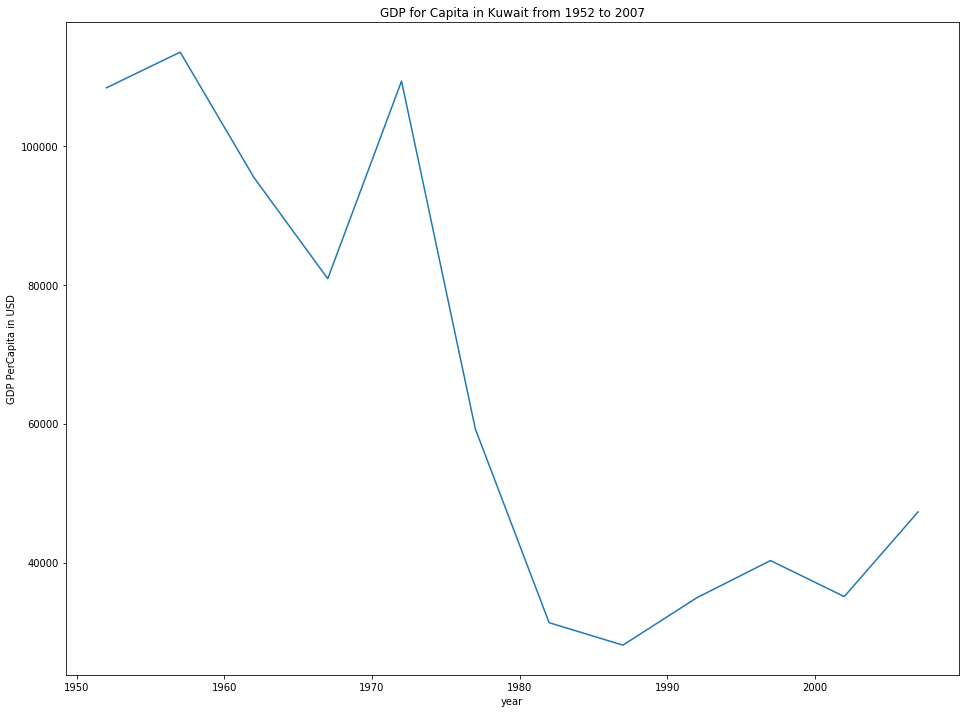

In [92]:
plt.figure(figsize=(16,12))
plt.plot(kuwait.year, kuwait.gdpPerCapita)
plt.title("GDP for Capita in Kuwait from 1952 to 2007")
plt.xlabel("year")
plt.ylabel('GDP PerCapita in USD')
plt.show()

#### Since GDP per capita is GDP per person - Lets analyze the GDP per capita, GDP and the Population of Kuwait

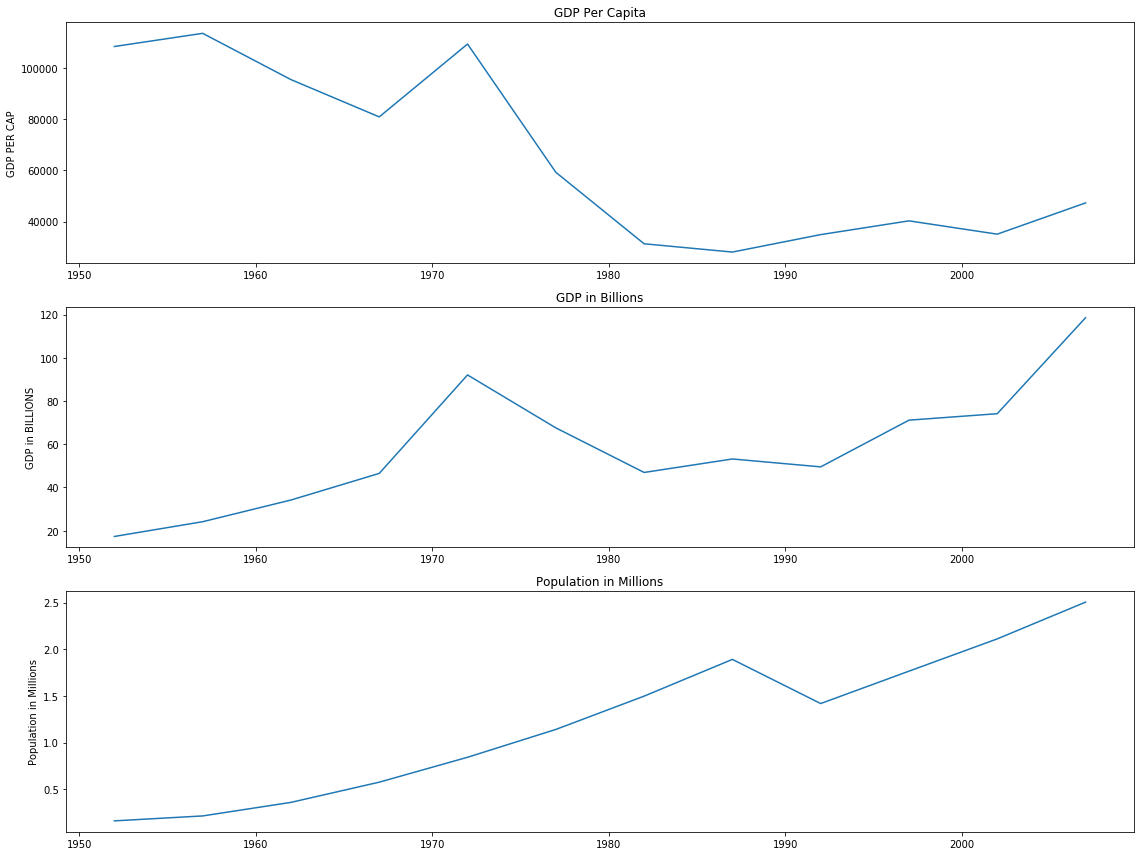

In [93]:
plt.figure(figsize=(16,12))

plt.subplot(311)
plt.title("GDP Per Capita")
plt.ylabel("GDP PER CAP")
plt.plot(kuwait.year, kuwait.gdpPerCapita)

plt.subplot(312)
plt.title("GDP in Billions")
plt.ylabel("GDP in BILLIONS")
plt.plot(kuwait.year, kuwait.gdpPerCapita * kuwait.population /10**9)

plt.subplot(313)
plt.title("Population in Millions")
plt.ylabel("Population in Millions")
plt.plot(kuwait.year, kuwait.population / 10**6)

plt.tight_layout()
plt.show()

#### Relative growth of GDP in relation to their population

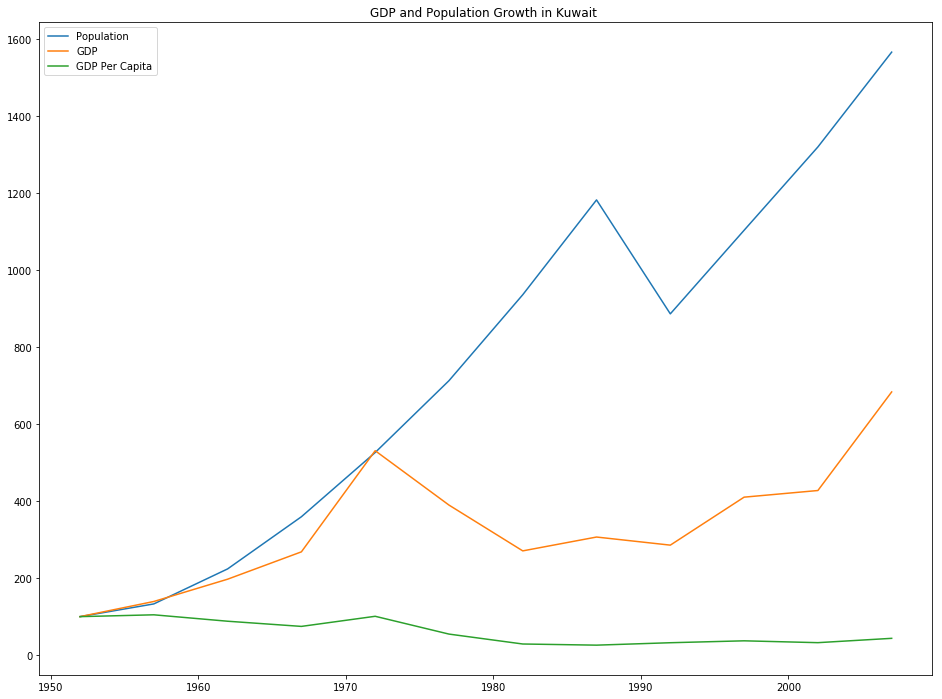

In [94]:
plt.figure(figsize=(16,12))
plt.plot(kuwait.year, kuwait.population / kuwait.population.iloc[0] * 100)

kuwait_gdp = kuwait.population * kuwait.gdpPerCapita
plt.plot(kuwait.year, kuwait_gdp / kuwait_gdp.iloc[0] * 100)
plt.plot(kuwait.year, kuwait.gdpPerCapita / kuwait.gdpPerCapita.iloc[0] * 100)

plt.title('GDP and Population Growth in Kuwait ')
plt.legend(['Population','GDP','GDP Per Capita'])

plt.show()

#### Lets compare this with the US

In [95]:
us = data[data.country == "United States"]

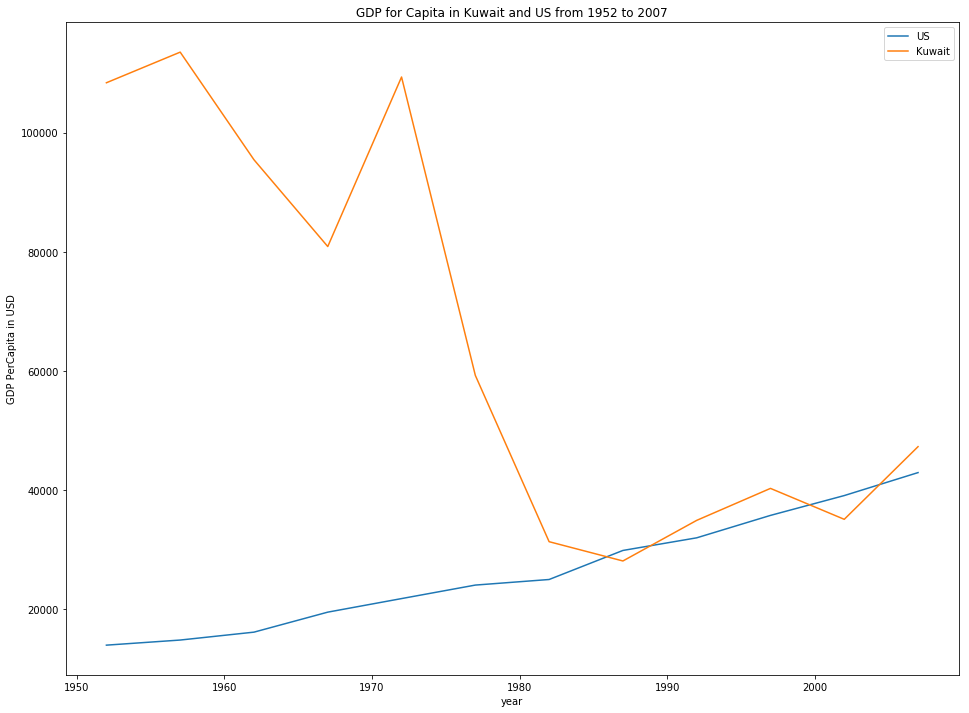

In [96]:
plt.figure(figsize=(16,12))
plt.plot(us.year, us.gdpPerCapita)
plt.plot(kuwait.year, kuwait.gdpPerCapita)
plt.title("GDP for Capita in Kuwait and US from 1952 to 2007")
plt.xlabel("year")
plt.ylabel('GDP PerCapita in USD')
plt.legend(['US','Kuwait'])
plt.show()

* So, is Kuwait really the richest country by per person basis? 
* A country like the US has a steadily growing GDP with 100 times more population than Kuwait, but is everyone rich? Are more people rich? I suppose?
* A country like Kuwait has a large amount of wealth with a very small population, does that indicate that there is a higher chance to get a slice of the pie? 
* In the end, You decide

* GDP Per Capita 2017 

https://www.statista.com/statistics/270180/countries-with-the-largest-gross-domestic-product-gdp-per-capita/

* GDP 2017 

https://www.statista.com/statistics/268173/countries-with-the-largest-gross-domestic-product-gdp/

** Thank you** 